### imports

In [30]:
from config.model_config import DATASET_CONFIG, PREPROCESS_CONFIG
from preprocess.preprocess_tools import STFT, Scaler
import preprocess.utility as sp
import numpy as np
import os
import torch
import norbert
from train.model import LSTM_Model
import librosa as lib
# matplotlib for graphs
import matplotlib.pyplot as plot
import matplotlib.cm as cm

### creating instances for preprocessing tools

In [3]:
# transformation object
transform = STFT(sr=DATASET_CONFIG.SR,
                 n_per_seg=DATASET_CONFIG.N_PER_SEG,
                 n_overlap=DATASET_CONFIG.N_OVERLAP)

# Scaler object
scaler = Scaler()

## Loading music file

In [4]:
track_path = r"../samples/Al James - Schoolboy Facination/mixture.wav"
# time series data of mixture
data, sr = sp.read(track_path, stereo=True)
print("Mixture file time series data shape: ", data.shape)

data_mix = sp.to_mono(data)
print("Shape of mono mixture time series data: ", data_mix.shape)

Mixture file time series data shape:  (300032, 2)
Shape of mono mixture time series data:  (300032, 1)


## Short time fourier transformation of time series data

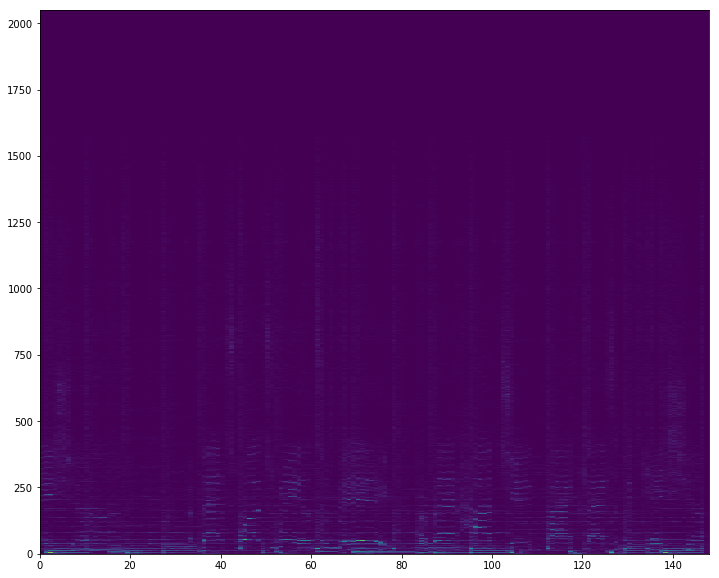

In [47]:
x_tf = transform.stft(data_mix.T)
# get spectrogram of STFT i.e., |Xi|
x_mix_stft = np.abs(x_tf)
f, axes = plot.subplots(1, figsize=(12, 10))
axes.pcolormesh(x_mix_stft[..., 0].T)

### Checking how normal scaling looks Normal Scaling

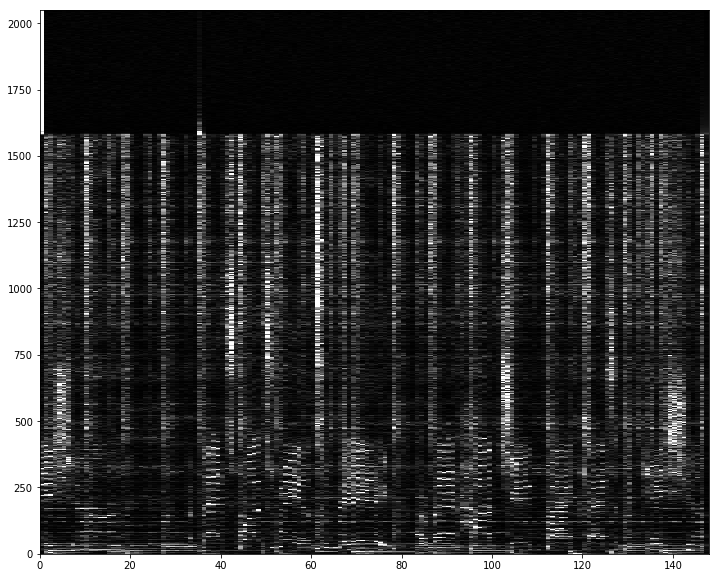

In [44]:
#this is not an actual step its only for demonstration
usual_normalization = lib.util.normalize(x_mix_stft)
f, axes = plot.subplots(1, figsize=(12, 10))
axes.pcolormesh(usual_normalization[..., 0].T, cmap=cm.gray)

### Scaling/Normalizing transformed data

Scaled data shape : (148, 2049, 1)
Scaled data min : 1.0
Scaled data max : 1.0
Scaled data mean : 0.143397146585328


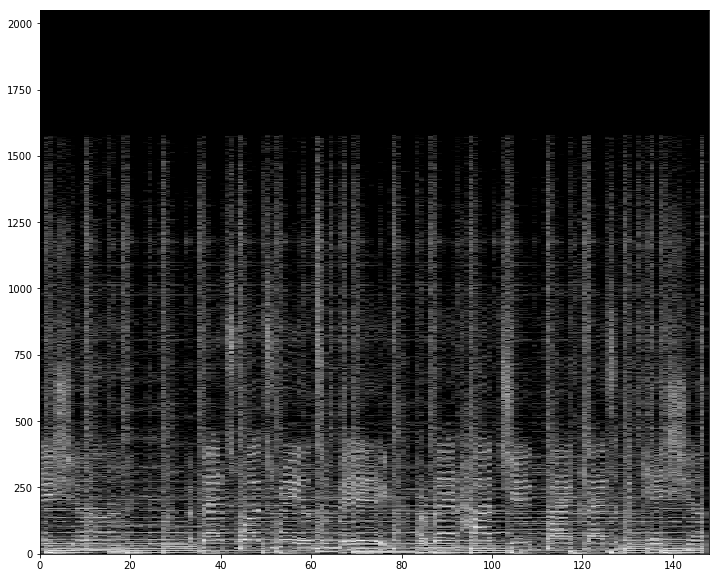

In [43]:
# scaling the values to 0 to 1
X_scaled = scaler.scale(x_mix_stft)
print("Scaled data shape :", X_scaled.shape)
print("Scaled data min :", np.max(X_scaled))
print("Scaled data max :", np.max(X_scaled))
print("Scaled data mean :", np.mean(X_scaled))

f, axes = plot.subplots(1, figsize=(12, 10))
axes.pcolormesh(X_scaled[..., 0].T, cmap=cm.gray)